In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [27]:
def fileToDf(fileName, numberToSample = 120000):
    file = open(fileName, "r")
    games = []
    dic = {}
    needed = ['White', 'Black','Result','WhiteElo','BlackElo']
    counter = 0; num_data = 0
    for l in file:
        if l[0] == "[":

            string = l[1:-1]

            header = string.split()[0]
            if (header in needed):
                dic[header] = string[len(header):-2].strip().strip('"')


        if l[:12] == "[Termination":
            num_data += 1
            games.append(dic)
            dic = {}
        else:
            pass

    df = pd.DataFrame(games)
    
    print(num_data)
    
    if(len(df)> numberToSample):
        index = np.random.choice(np.arange(0, len(df)),size =numberToSample,replace = False)
        df = df.iloc[index,:]
#     df.to_csv('games.csv', index=False)

#     df1 = pd.read_csv('games.csv')
    
    return df.copy(), num_data

def fileToDf2(fileName, maxsize = int(1e6)):
    with open(fileName, 'r') as file:
        games = []
        dic = {}
        needed = ['White', 'Black','Result','WhiteElo','BlackElo']
        counter = 0
        filecounter = 0
        numData = 0
        for l in tqdm(file):
            if l[0] == "[":

                string = l[1:-1]

                header = string.split()[0]
                if (header in needed):
                    dic[header] = string[len(header):-2].strip().strip('"')


            if l[:12] == "[Termination":

                counter +=1
                games.append(dic)
                del (dic)
                dic = {}
                numData += 1
                if (counter>=maxsize):
                  counter = 0


                  df = pd.DataFrame(games)
                  df.to_csv('Data/temp/'+str(filecounter)+'.csv')
                  filecounter +=1
                  del (games)
                  del (df)
                  games = []
            else:
                pass
        if (len(games) != 0 ):
          df = pd.DataFrame(games)
          df.to_csv('Data/temp/'+str(filecounter)+'.csv')

        #df = pd.DataFrame(games)

        # if(len(df)> numberToSample):
        #     index = np.random.choice(np.arange(0, len(df)),size =numberToSample,replace = False)
        #     df = df.iloc[index,:]
    #     df.to_csv('games.csv', index=False)

    #     df1 = pd.read_csv('games.csv')
    
    return numData

def fileToDfFICS(fileName, maxsize = int(1e6)):
    with open(fileName, 'r') as file:
        games = []
        dic = {}
        needed = ['White', 'Black','Result','WhiteElo','BlackElo']
        counter = 0
        filecounter = 0
        numData = 0
        for l in tqdm(file):
            if l[0] == "[":

                string = l[1:-1]

                header = string.split()[0]
                if (header in needed):
                    dic[header] = string[len(header):-2].strip().strip('"')

            if l[:7] == "[Result":

                counter +=1
                games.append(dic)
                del (dic)
                dic = {}
                numData += 1
                if (counter>=maxsize):
                  counter = 0


                  df = pd.DataFrame(games)
                  df.to_csv('Data/FICS/temp/'+str(filecounter)+'.csv')
                  filecounter +=1
                  del (games)
                  del (df)
                  games = []
            else:
                pass
        if (len(games) != 0 ):
          df = pd.DataFrame(games)
          df.to_csv('Data/FICS/temp/'+str(filecounter)+'.csv')

        #df = pd.DataFrame(games)

        # if(len(df)> numberToSample):
        #     index = np.random.choice(np.arange(0, len(df)),size =numberToSample,replace = False)
        #     df = df.iloc[index,:]
    #     df.to_csv('games.csv', index=False)

    #     df1 = pd.read_csv('games.csv')
    
    return numData

### Process Per Month

In [151]:
# Process per month
year = 2019
month = str(12).zfill(2)
numbers = fileToDf2("Data/2016/lichess_db_standard_rated_"+str(year)+'-'+month+'.pgn')

169826234it [04:21, 650590.63it/s] 


In [153]:
# Sample 120K from each month
sample_size = 120*1000
index = np.random.choice(numbers, sample_size)

fileNumbers = index // int(1e6)
indexInFiles = index % int(1e6)
dfFinal = pd.DataFrame()
for data in range(np.max(fileNumbers)+1):
  indexInFile = indexInFiles[np.where(data == fileNumbers)[0]]
  
  dfChunk = pd.read_csv('Data/temp/'+ str(data)+'.csv')
  dfFinal = dfFinal.append(dfChunk.iloc[indexInFile,:])

In [20]:
# FICS Process per month
year = 2019
month = str(1).zfill(2)
numbers = fileToDfFICS("Data/FICS/2019/ficsgamesdb_"+str(year)+'_'+month+'.pgn')

11719182it [00:16, 704388.41it/s]


In [28]:
# FICS Process per year
year = 2019
numbers = fileToDfFICS("Data/FICS/2019/ficsgamesdb_"+str(year)+'_All.pgn')

119147975it [04:22, 454062.90it/s]


In [30]:
numbers

5916844

In [ ]:
# Sample 120K from each month
sample_size = 120*1000
index = np.random.choice(numbers, sample_size)

fileNumbers = index // int(1e6)
indexInFiles = index % int(1e6)
dfFinal = pd.DataFrame()
for data in range(np.max(fileNumbers)+1):
  indexInFile = indexInFiles[np.where(data == fileNumbers)[0]]
  
  dfChunk = pd.read_csv('Data/temp/'+ str(data)+'.csv')
  dfFinal = dfFinal.append(dfChunk.iloc[indexInFile,:])

In [33]:
# FICS Sample 1.44M for a whole year
sample_size = int(1.44 * 1e6)
index = np.random.choice(numbers, sample_size)

fileNumbers = index // int(1e6)
indexInFiles = index % int(1e6)
dfFinal = pd.DataFrame()
for data in range(np.max(fileNumbers)+1):
  indexInFile = indexInFiles[np.where(data == fileNumbers)[0]]
  
  dfChunk = pd.read_csv('Data/temp/'+ str(data)+'.csv')
  dfFinal = dfFinal.append(dfChunk.iloc[indexInFile,:])

In [34]:
dfFinal

,Unnamed: 0,White,Black,WhiteElo,BlackElo,Result
661394,661394,ytunde,janok,1682,1545,1-0
915708,915708,bijsah,Babuya,1243,1259,0-1
638642,638642,anjii,MisterMustard,1465,1574,0-1
210827,210827,wycliff,KECHMATE,1518,1713,0-1
962134,962134,centrozap,sirschaap,1652,1575,0-1
...,...,...,...,...,...,...
285916,285916,mcSol_aar,ebi1553,1803,1814,1/2-1/2
334037,334037,catgotyourtongue,EZZELDEEN,1867,1462,1-0
842124,842124,n3b4,lukasi96,1286,1257,0-1
893658,893658,adekcz,AlpAlp54,1912,1704,1-0


In [35]:
dfFinal.to_csv('Data/FICS/2019/2019_All.csv')

In [3]:
# Combine into a single dataframe once above is ran for 12 months
df_result = pd.DataFrame()
for month in range(1, 13):
    month_name = str(month).zfill(2)
    name = 'Data/2019/2019-'+str(month_name)+'.csv'
    dat = pd.read_csv(name)
    df_result = df_result.append(dat)

In [4]:
columns_wanted = ['White', 'Black', 'Result', 'WhiteElo', 'BlackElo']
columns = df_result.columns
discarded = columns[~np.isin(columns, columns_wanted)]

print(discarded)

Index(['Unnamed: 0'], dtype='object')


In [5]:
df_result = df_result.drop(columns = discarded)
df_result

,White,Black,Result,WhiteElo,BlackElo
0,monxo1978,playanotherone,0-1,946,1805
1,Nurcancakmaz,notwey,0-1,800,854
2,Enamul,ARCHAVATAR72,1-0,1910,1592
3,almostbeatlevel0,TheWiseKitty,0-1,1030,983
4,bonecollector,Hulkiorra,1-0,2034,1827
...,...,...,...,...,...
119995,walterjaramillo,jj1987,0-1,2225,2196
119996,abhijeetbmeut28,Sauvier,0-1,1798,1774
119997,elmatador321,dagenssuppe,0-1,1954,1956
119998,jawad_baddad33,Mala-Mia,0-1,1810,1856


In [7]:
df_result.to_csv('Data/2019/2019_All.csv')

### Process Whole Year

In [85]:
#listOptions = "lichess_db_standard_rated_"-0
listAppend = []
year = 2016
df = pd.DataFrame()
for i in tqdm(range(12)):
    number_str = str(i+1)
    month  = number_str.zfill(2)
    name = 'Data/'+str(year)+"/lichess_db_standard_rated_"+str(year)+'-'+month+'.pgn'
    
    print(f"Year {year} month {i + 1} ori data count")
    
    data, num_data = fileToDf(name)
    df = df.append(data)
    
    #print(name)

  0%|          | 0/12 [00:00<?, ?it/s]

Year 2015 month 1 ori data count
1497237


  8%|▊         | 1/12 [00:21<03:57, 21.61s/it]

Year 2015 month 2 ori data count
1495553


 17%|█▋        | 2/12 [00:42<03:32, 21.22s/it]

Year 2015 month 3 ori data count
1742733


 25%|██▌       | 3/12 [01:08<03:28, 23.15s/it]

Year 2015 month 4 ori data count
1785418


 33%|███▎      | 4/12 [01:33<03:11, 23.95s/it]

Year 2015 month 5 ori data count
2137557


 42%|████▏     | 5/12 [02:03<03:02, 26.13s/it]

Year 2015 month 6 ori data count
2324106


 50%|█████     | 6/12 [02:36<02:50, 28.42s/it]

Year 2015 month 7 ori data count
2455141


 58%|█████▊    | 7/12 [03:11<02:33, 30.69s/it]

Year 2015 month 8 ori data count
2621861


 67%|██████▋   | 8/12 [03:48<02:11, 32.87s/it]

Year 2015 month 9 ori data count
2844677


 75%|███████▌  | 9/12 [04:29<01:45, 35.20s/it]

Year 2015 month 10 ori data count
3400418


 83%|████████▎ | 10/12 [05:21<01:21, 40.54s/it]

Year 2015 month 11 ori data count
3595776


 92%|█████████▏| 11/12 [06:13<00:44, 44.11s/it]

Year 2015 month 12 ori data count
4161162


100%|██████████| 12/12 [07:13<00:00, 36.16s/it]


In [86]:
df = df.drop_duplicates()
len(df)

1439767

In [88]:
df.to_csv('Data/2015/2015_2.csv', index=False)

In [16]:
#lichess_db_standard_rated_2013-01.pgn
file = open("lichess_db_standard_rated_2013-01.pgn/lichess_db_standard_rated_2013-01.pgn", "r")

array([75, 23, 59,  2, 90, 41, 45, 83,  1, 82, 81, 14, 32, 20,  7, 95, 94,
       77, 76, 92, 54,  6, 22, 97, 11, 68, 74, 40, 53, 30,  0, 13, 25, 96,
       58, 29, 56, 60, 67, 39, 99, 71, 65, 21, 38, 31, 50, 63, 19, 88, 43,
       46, 49, 37, 15, 48, 69, 16, 47, 17])

In [18]:

print(df1)

                   White              Black Result WhiteElo BlackElo
0                    NaN                NaN    NaN      NaN      NaN
1         Desmond_Wilson          savinka59    1-0     1654     1919
2          Kozakmamay007  VanillaShamanilla    1-0     1643     1747
3       Naitero_Nagasaki                800    0-1     1824     1973
4           nichiren1967   Naitero_Nagasaki    0-1     1765     1815
...                  ...                ...    ...      ...      ...
121327       Yudhisthira           netsah08    0-1     1854     1937
121328             Daler        kualalumpur    0-1     1500     1266
121329             senip        Richard_XII    0-1     1431     1523
121330              van9           shueardm    1-0     1693     1479
121331        pablotorre         Tortfeasor    0-1     1744     1762

[121332 rows x 5 columns]


In [19]:
df1

,White,Black,Result,WhiteElo,BlackElo
0,NaN,NaN,NaN,NaN,NaN
1,Desmond_Wilson,savinka59,1-0,1654,1919
2,Kozakmamay007,VanillaShamanilla,1-0,1643,1747
3,Naitero_Nagasaki,800,0-1,1824,1973
4,nichiren1967,Naitero_Nagasaki,0-1,1765,1815
...,...,...,...,...,...
121327,Yudhisthira,netsah08,0-1,1854,1937
121328,Daler,kualalumpur,0-1,1500,1266
121329,senip,Richard_XII,0-1,1431,1523
121330,van9,shueardm,1-0,1693,1479


In [28]:
np.unique(np.array(df1['Result'].loc[1:]),return_counts = True)

(array(['0-1', '1-0', '1/2-1/2'], dtype=object),
 array([55221, 62128,  3982], dtype=int64))

In [6]:
header

'Termination'

In [7]:
string = "test a"
string.split()

['test', 'a']

In [4]:
df1

,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,BlackTitle,WhiteTitle
0,Rated Classical game,https://lichess.org/j1dkb5dw,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,5.0,-8.0,C00,French Defense: Normal Variation,600+8,Normal,NaN,NaN
1,Rated Classical game,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,1-0,2012.12.31,23:04:12,1654,1919,19.0,-22.0,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,NaN,NaN
2,Rated Classical game,https://lichess.org/szom2tog,Kozakmamay007,VanillaShamanilla,1-0,2012.12.31,23:03:15,1643,1747,13.0,-94.0,C50,Four Knights Game: Italian Variation,420+17,Normal,NaN,NaN
3,Rated Bullet game,https://lichess.org/rklpc7mk,Naitero_Nagasaki,800,0-1,2012.12.31,23:04:57,1824,1973,-6.0,8.0,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,NaN,NaN
4,Rated Bullet game,https://lichess.org/1xb3os63,nichiren1967,Naitero_Nagasaki,0-1,2012.12.31,23:02:37,1765,1815,-9.0,9.0,C00,French Defense: La Bourdonnais Variation,60+1,Normal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121327,Rated Classical game,https://lichess.org/4w6vfr19,Yudhisthira,netsah08,0-1,2013.01.31,22:59:08,1854,1937,-9.0,16.0,E80,King's Indian Defense: Saemisch Variation,600+10,Normal,NaN,NaN
121328,Rated Classical game,https://lichess.org/33p7nthu,Daler,kualalumpur,0-1,2013.01.31,22:59:13,1500,1266,-331.0,12.0,B01,Scandinavian Defense,720+0,Time forfeit,NaN,NaN
121329,Rated Classical game,https://lichess.org/pzncnhrt,senip,Richard_XII,0-1,2013.01.31,22:59:27,1431,1523,-70.0,7.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,960+6,Normal,NaN,NaN
121330,Rated Blitz game,https://lichess.org/hhwb2whr,van9,shueardm,1-0,2013.01.31,22:59:41,1693,1479,6.0,-5.0,B00,Barnes Defense,180+1,Normal,NaN,NaN


In [5]:
len(df1['Site'].unique())

121332

In [ ]:
numcount = 0; file = open('Data/2013/lichess_db_standard_rated_2013-10.pgn', 'r'); numcount2 = 0; numcount3 = 0; start = 0
possible = ['\n', '[', '1']
for idx, l in enumerate(file):
    if start > 0:
        print(l)
        start -= 1
    if l[:12] == '[Termination':
        numcount3 += 1
    if l[0] == '1':
        numcount+=1
    if l[0] not in possible:
        print(l)
        numcount2 += 1
        start += 20
    
print(numcount)

In [7]:
from scipy.stats import multivariate_normal
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [61]:
x = np.linspace(-4, 4, 1001)
y = np.linspace(-4, 4, 1001)
x_grid, y_grid = np.meshgrid(x, y)
samples = np.concatenate([x_grid.reshape(-1, 1), y_grid.reshape(-1, 1)], axis = 1)
pdf = multivariate_normal.pdf(samples, mean = [0, 0], cov = [[1, 0.5], [0.5, 4]])
pdf_grid = pdf.reshape(1001, 1001)

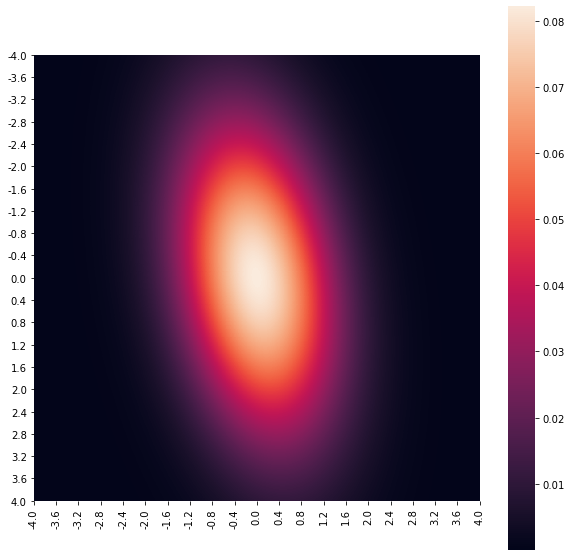

In [68]:
plt.figure(figsize = (10, 10))
xticksloc = np.linspace(0, 1000, 21).astype('int64')
yticksloc = np.linspace(0, 1000, 21).astype('int64')
ax = sb.heatmap(pdf_grid, square = True)
ax.set_xticks(xticksloc)
ax.set_yticks(yticksloc)
a = ax.set_xticklabels(np.around(x[xticksloc], decimals = 1))
a = ax.set_yticklabels(np.around(y[yticksloc], decimals = 1))

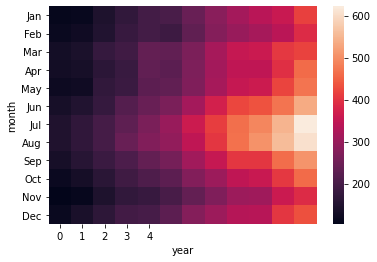

In [47]:
flights = sb.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sb.heatmap(flights, xticklabels = np.arange(5))

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nashpy as nash
import itertools
import cvxpy as cp
import cvxopt
from tqdm import tqdm
import seaborn as sb
from scipy.stats import skewnorm
from scipy.optimize import minimize
import pickle

In [75]:
def solve_MaxEnt_NE(payoff, verbose = False, eps = 1e-5, zero_tol = 1e-6, iters = 500, cycle = 5):
    
    init_val = np.random.uniform(size = payoff.shape[0])
    init_val = init_val / np.sum(init_val)
    
    p = cp.Variable(payoff.shape[0], value = init_val)
    constraints = [payoff @ p <= 0, cp.sum(p) == 1, p >= 0]
    objective = cp.sum(cp.entr(p))
    prob = cp.Problem(cp.Maximize(objective), constraints)
    
    try:
      cycle_count = 0; done = False
      while cycle_count < cycle and done is False:
        prob.solve(verbose = verbose, solver = cp.MOSEK, warm_start = True)
        
        print(f"Solution {p.value}")
        p_vect = p.value * (p.value > zero_tol)
        diff = payoff @ p_vect.reshape(-1, 1)
        print(f"Cycle count {cycle_count}, diff = {np.sum(diff >= eps)}")
        done = True if np.sum(diff >= eps) == 0 else False
        cycle_count += 1
    except cp.SolverError:
      print("MOSEK FAILED?")
      try:
        # Try ECOS_BB first
        cycle_count = 0; done = False
        while cycle_count < cycle and done is False:
          prob.solve(verbose = verbose, max_iters = 1000, solver = cp.ECOS_BB, warm_start = True)
          p_vect = p.value * (p.value > zero_tol)
          diff = payoff @ p_vect.reshape(-1, 1)
          print(f"Cycle count {cycle_count}, diff = {np.sum(diff >= eps)}")
          done = True if np.sum(diff >= eps) == 0 else False
          cycle_count += 1
      except cp.SolverError:
        print("ECOS_BB FAILED")
        cycle_count = 0; done = False
        while cycle_count < cycle and done is False:
          prob.solve(verbose = verbose, max_iters = iters, solver = cp.SCS, warm_start = True)
          p_vect = p.value * (p.value > zero_tol)
          diff = payoff @ p_vect.reshape(-1, 1)
          print(f"Cycle count {cycle_count}, diff = {np.sum(diff >= eps)}")
          done = True if np.sum(diff >= eps) == 0 else False
          cycle_count += 1
  
    # Clean - small values
    p_vect = p_vect * (p_vect > zero_tol)
    return p_vect, np.sum(diff>=eps)

In [92]:
init_val = np.random.uniform(size = payoff.shape[0])
init_val = init_val / np.sum(init_val)

p = cp.Variable(payoff.shape[0], value = init_val)
constraints = [payoff @ p <= 0, cp.sum(p) == 1, p >= 0]
objective = cp.sum(p)
prob = cp.Problem(cp.Maximize(objective), constraints)
prob.solve(verbose = True, solver = cp.MOSEK, warm_start = True)
print(p.value)

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Aug 12 04:56:06 PM: Your problem has 3 variables, 3 constraints, and 0 parameters.
(CVXPY) Aug 12 04:56:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 12 04:56:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 12 04:56:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 12 04:56:06 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Aug 12 04:56:06 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Cone

In [86]:
# payoff = np.array([[3, -1], [-2, 1]])
payoff = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])

In [91]:
init_val = np.random.uniform(size = payoff.shape[0])
init_val = init_val / np.sum(init_val)
p1 = cp.Variable(payoff.shape[0], value = init_val)
l1 = payoff.shape[0]
print(p1.value)

init_val = np.random.uniform(size = payoff.shape[1])
init_val = init_val / np.sum(init_val)
p2 = cp.Variable(payoff.shape[1], value = init_val)
l2 = payoff.shape[1]
print(p2.value)

constraints = [cp.reshape(p1,(1, l1)) @ payoff @ cp.reshape(p2, (l2,1)) >= payoff @ cp.reshape(p2, (l2,1)),
              cp.reshape(p1,(1, l1)) @ payoff @ cp.reshape(p2, (l2,1)) >= (-payoff).T @ cp.reshape(p1,(l1, 1)), 
              p1 >=0, p2>=0, cp.sum(p1) == 1, cp.sum(p2) == 1]

objective = cp.sum(p1) + cp.sum(p2)
prob = cp.Problem(cp.Maximize(objective), constraints)
prob.solve(verbose = True, solver = cp.MOSEK, warm_start = True)

print(p1.value)
print(p2.value)

[0.24432559 0.02493538 0.73073903]
[0.08012424 0.45979525 0.4600805 ]
                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Aug 12 04:52:45 PM: Your problem has 6 variables, 6 constraints, and 0 parameters.
(CVXPY) Aug 12 04:52:45 PM: It is compliant with the following grammars: 
(CVXPY) Aug 12 04:52:45 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 12 04:52:45 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


DCPError: Problem does not follow DCP rules. Specifically:
The following constraints are not DCP:
[[ 0. -1.  1.]
 [ 1.  0. -1.]
 [-1.  1.  0.]] @ reshape(var572, (3, 1), F) <= reshape(var571, (1, 3), F) @ [[ 0. -1.  1.]
 [ 1.  0. -1.]
 [-1.  1.  0.]] @ reshape(var572, (3, 1), F) , because the following subexpressions are not:
|--  reshape(var571, (1, 3), F) @ [[ 0. -1.  1.]
 [ 1.  0. -1.]
 [-1.  1.  0.]] @ reshape(var572, (3, 1), F)
[[ 0. -1.  1.]
 [ 1.  0. -1.]
 [-1.  1.  0.]] @ reshape(var571, (3, 1), F) <= reshape(var571, (1, 3), F) @ [[ 0. -1.  1.]
 [ 1.  0. -1.]
 [-1.  1.  0.]] @ reshape(var572, (3, 1), F) , because the following subexpressions are not:
|--  reshape(var571, (1, 3), F) @ [[ 0. -1.  1.]
 [ 1.  0. -1.]
 [-1.  1.  0.]] @ reshape(var572, (3, 1), F)

In [93]:
def create_CE_matrix(payoff):
    """
    - Create CE constraint matrix, of size n * |A|_P_2 x |A|^n
    - Payoff is of shape |A| x |A|; assume 2 players symmetric
    """
    action_num = payoff.shape[0]
    mat_row = []; mat_col = []; flattened_gain_rp = []; flattened_gain_cp = []
    
    for i in range(action_num):
        for j in range(action_num):
            if i == j: # only between pairs of non-identical action. Ordering matters
                continue
            else:
                # For Row Player
                # player switches FROM i to j. Hence gain = payoff[j] - payoff[i]
                row = np.zeros((action_num, action_num)) # make square first then reshape so indexing is easier
                
                # Set the entries to gain, only for those that correspond to row player making action i
                # Convention is: 0,0,..., 0,|A|, 1,0, ..., 1,|A|,..., |A|,|A|. Since square, indexing is easier
                diff = payoff[j, :] - payoff[i, :]
                row[i, :] = diff
#                 flattened_gain_rp.append(diff)
                row = row.flatten()
                mat_row.append(row)
                
                
                # For Column Player
                row = np.zeros((action_num, action_num)) # make square first then reshape so indexing is easier
                
                diff = -payoff[:, j] + payoff[:, i]
                row[:, i] = diff
#                 flattened_gain_cp.append(diff)
                row = row.flatten()
                mat_col.append(row)

    return np.array(mat_row + mat_col) #, np.array(flattened_gain_rp + flattened_gain_cp).flatten()

In [115]:
def create_CE_matrix(payoff_row, payoff_col):
    """
    - Create CE constraint matrix, of size n * |A|_P_2 x |A|^n
    - Payoff is of shape |A| x |A|; assume 2 players symmetric
    """
    action_num = payoff_row.shape[0]
    mat_row = []; mat_col = []; flattened_gain_rp = []; flattened_gain_cp = []
    
    for i in range(action_num):
        for j in range(action_num):
            if i == j: # only between pairs of non-identical action. Ordering matters
                continue
            else:
                # For Row Player
                # player switches FROM i to j. Hence gain = payoff[j] - payoff[i]
                row = np.zeros((action_num, action_num)) # make square first then reshape so indexing is easier
                
                # Set the entries to gain, only for those that correspond to row player making action i
                # Convention is: 0,0,..., 0,|A|, 1,0, ..., 1,|A|,..., |A|,|A|. Since square, indexing is easier
                diff = payoff_row[j, :] - payoff_row[i, :]
                row[i, :] = diff
#                 flattened_gain_rp.append(diff)
                row = row.flatten()
                mat_row.append(row)
                
                
                # For Column Player
                row = np.zeros((action_num, action_num)) # make square first then reshape so indexing is easier
                
                diff = payoff_col[:, j] - payoff_col[:, i]
                row[:, i] = diff
#                 flattened_gain_cp.append(diff)
                row = row.flatten()
                mat_col.append(row)

    return np.array(mat_row + mat_col) #, np.array(flattened_gain_rp + flattened_gain_cp).flatten()

In [128]:
# payoff = np.array([[3, -1], [-2, 1]])
# payoff = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
payoff_row = np.array([[0, 7], [2, 6]])
payoff_col = np.array([[0, 2], [7, 6]])
U = create_CE_matrix(payoff_row, payoff_col)

In [129]:
U

array([[ 2., -1.,  0.,  0.],
       [ 0.,  0., -2.,  1.],
       [ 2.,  0., -1.,  0.],
       [ 0., -2.,  0.,  1.]])

In [135]:
init_val = np.random.uniform(0, 1, size = U.shape[1])
init_val = init_val / np.sum(init_val)
lp = U.shape[1]
p = cp.Variable(U.shape[1], value = init_val)
p_mat = cp.reshape(p, (2,2))
eps = 0
constraints = [U @ cp.reshape(p, (lp, 1)) <= eps, cp.sum(p) == 1, p >= 0]
objective = cp.sum(cp.multiply(p_mat,payoff_row)) + cp.sum(cp.multiply(p_mat, payoff_col))
# objective = cp.sum(p)
problem = cp.Problem(cp.Maximize(objective), constraints)

problem.solve(verbose = True, solver = cp.MOSEK, warm_start = True)
joint_p = p.value

                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Aug 12 07:13:58 PM: Your problem has 4 variables, 3 constraints, and 0 parameters.
(CVXPY) Aug 12 07:13:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 12 07:13:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 12 07:13:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 12 07:13:58 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Aug 12 07:13:58 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> Cone

In [136]:
p_mat.value

array([[-1.16202999e-10,  2.50000000e-01],
       [ 2.50000000e-01,  5.00000000e-01]])

In [138]:
sol2 = np.array([[0, 1], [0, 0]])
U @ sol2.reshape(-1, 1)

array([[-1.],
       [ 0.],
       [ 0.],
       [-2.]])

In [139]:
U @ joint_p.reshape(-1, 1)

array([[-2.50000000e-01],
       [ 3.07425141e-10],
       [-2.50000000e-01],
       [ 3.07425141e-10]])